# This notebook is for Exploratory Data Analysis On Haberman's Survival Dataset.

Dataset Name: Habermans-survival-data-set.

Dataset Link: https://www.kaggle.com/gilsousa/habermans-survival-data-set

Description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

EDA By: Maddy


###### Objective of the analysis: 
* To find whether the patient will be able to survive for more than 5 years after cancer operation given the age, operation year and positive auxilary lymph nodes.

In [164]:
#Importing required libraries for analysis
import pandas as pd                       #Pandas for reading the dataset
import seaborn as sns                     #Seaborn for plotting
import matplotlib.pyplot as plt           #Matplotlib for plotting
import numpy as np                        #Numpy for processing the dataframes

In [165]:
#Reading the dataset into a dataframe
h_data=pd.read_csv("C:\Madhusudan Learning AI\Applied AI\Chapter 8 EDA\haberman.csv")

In [166]:
#Printing the shape
print(h_data.shape)

(305, 4)


* The shape of the dataset is (305,4). It depicts that the dataset has 305 rows and 4 columns. 

In [167]:
#Printing the column names
print(h_data.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


* The dataset does not have column headers predefined. So need to add it to the dataframe.

* As per the documentation of this dataset the columns are (Age,Op_year,axil_nodes_det,Surv_status)

In [168]:
#Adding the column details to ther dataset
h_data.columns=["Age","Op_year","axil_nodes_det","Surv_status"] 

In [169]:
#Printing the column names
print(h_data.columns)

Index(['Age', 'Op_year', 'axil_nodes_det', 'Surv_status'], dtype='object')


* So now we have the column header defined

In [170]:
#Looking at some data points
print(h_data.head(10))

   Age  Op_year  axil_nodes_det  Surv_status
0   30       62               3            1
1   30       65               0            1
2   31       59               2            1
3   31       65               4            1
4   33       58              10            1
5   33       60               0            1
6   34       59               0            2
7   34       66               9            2
8   34       58              30            1
9   34       60               1            1


* The column understanding:
1. Age : Age of the patient at the time of operation.
2. Op_year :  Year of operation.
3. axil_nodes_det : Positive axilary nodes detected
4. Surv_status : (Whether the patient survived for more than 5 years or less (2: died within 5 years , 5: survived more than 5 years)

> Axilary Lymph nodes:
The body has about 20 to 40 bean-shaped axillary lymph nodes located in the underarm area. These lymph nodes are responsible for draining lymph – a clear or white fluid made up of white blood cells – from the breasts and surrounding areas, including the neck, the upper arms, and the underarm area.
During surgical procedures to remove breast cancer, including lumpectomies and partial, modified radical, radical, or total mastectomies, surgeons often remove some of the axillary lymph nodes to determine whether the breast cancer has spread, and also to determine cancer staging. If breast cancer spreads, the lymph nodes in the underarm (the axillary lymph nodes) are the first place it’s likely to go.

* Lymph node-positive means the axillary lymph nodes contain cancer. The more number of positive auxilary lymph nodes meand more worse the situation is.



###### Q. How many patients survived more than 5 years and how many did not?

In [171]:
h_data["Surv_status"].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

- Out of 305 patients 224 survived for more than 5 years and 81 could not. So, this is not a balanced dataset.

In [172]:
h_data.describe()

,Age,Op_year,axil_nodes_det,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Univariate analysis:

This analysis is just to know the behaviour of individual attribute i.e. Age

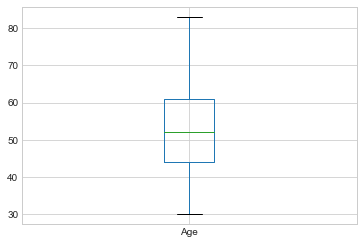

In [173]:
#Creating the box plot for age to see in which age group most number of patients fall
h_data["Age"].plot(kind='box')

So most number of patients falls between the age of 45 to 60.

In [174]:
print("Mean age is: {0}".format(np.mean(h_data["Age"])))
print("Median of age is: {0}".format(np.median(h_data["Age"])))
print("The standard deviation of age is:{0}".format(np.std(h_data["Age"])))

Mean age is: 52.5311475409836
Median of age is: 52.0
The standard deviation of age is:10.726396748570311


In [175]:
#Maximum age in the dataset
np.max(h_data["Age"])

83

In [176]:
#Minimum age in the dataset
np.min(h_data["Age"])

30

### Analysis of the attribute Age:

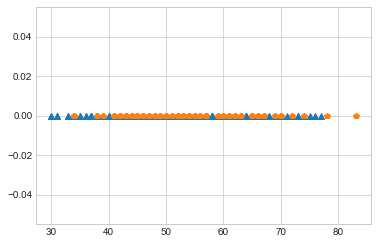

In [177]:
# One dimensional scatter plot

survive = h_data.loc[h_data["Surv_status"] == 1];
notsurvive = h_data.loc[h_data["Surv_status"] == 2];

plt.plot(survive["Age"], np.zeros_like(survive['Age']), '^')
plt.plot(notsurvive["Age"], np.zeros_like(notsurvive['Age']), 'p')
#plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


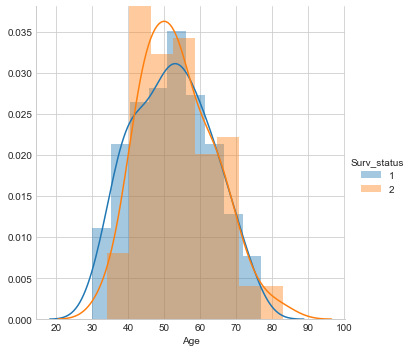

In [178]:
sns.FacetGrid(h_data, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

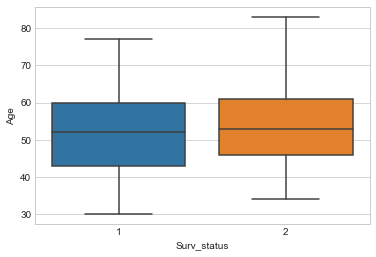

In [179]:
sns.boxplot(x='Surv_status',y='Age', data=h_data)
plt.show()

#### * Age cannot clearly define the survival of the patient.

[0.15625    0.21875    0.33035714 0.20535714 0.08928571]
[30.  39.4 48.8 58.2 67.6 77. ]


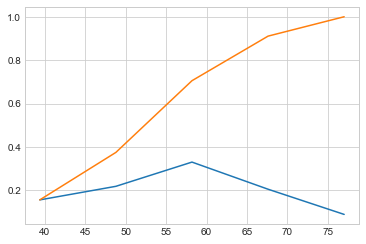

In [180]:

counts, bin_edges = np.histogram(survive['Age'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

* Around 25 % of the survived patients were of age between 50 to 60 (PDF)
* Around 85% of patients who survived were of age less than around 68 years (CDF)

### Analysis of positive axilary nodes with survival

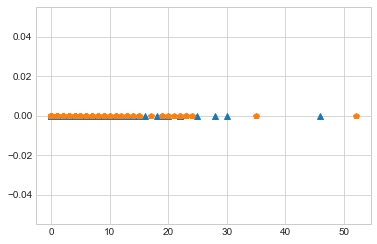

In [181]:
# One dimensional scatter plot

survive = h_data.loc[h_data["Surv_status"] == 1];
notsurvive = h_data.loc[h_data["Surv_status"] == 2];

plt.plot(survive["axil_nodes_det"], np.zeros_like(survive['axil_nodes_det']), '^')
plt.plot(notsurvive["axil_nodes_det"], np.zeros_like(notsurvive['axil_nodes_det']), 'p')


plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


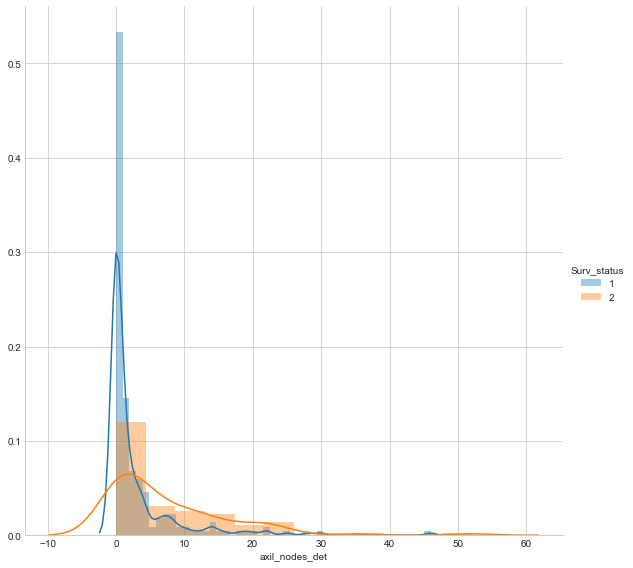

In [182]:
sns.FacetGrid(h_data, hue="Surv_status", size=8) \
   .map(sns.distplot, "axil_nodes_det") \
   .add_legend();
plt.show();

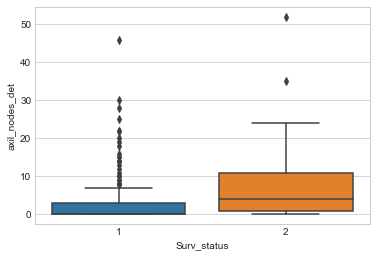

In [183]:
sns.boxplot(x='Surv_status',y='axil_nodes_det', data=h_data)
plt.show()

* Number of positive axil nodes is not sufficient to depict the survival of the patient.

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


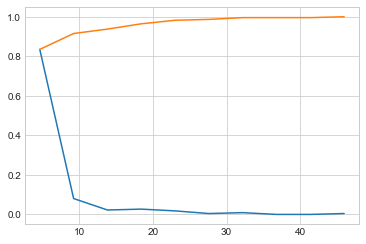

In [184]:

counts, bin_edges = np.histogram(survive['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

* Around 80% of the survived patients were having positive axil nodes between 0-10(PDF)
* Around 85% of the survived patients have positive axil nodes less than 10. (CDF)

### Analysis of Operation year and its relation with survival

NameError: name 'iris' is not defined

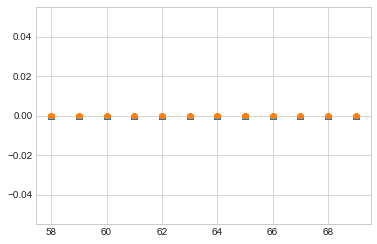

In [185]:
# One dimensional scatter plot

survive = h_data.loc[h_data["Surv_status"] == 1];
notsurvive = h_data.loc[h_data["Surv_status"] == 2];

plt.plot(survive["Op_year"], np.zeros_like(survive['Op_year']), '^')
plt.plot(notsurvive["Op_year"], np.zeros_like(notsurvive['Op_year']), 'p')
sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


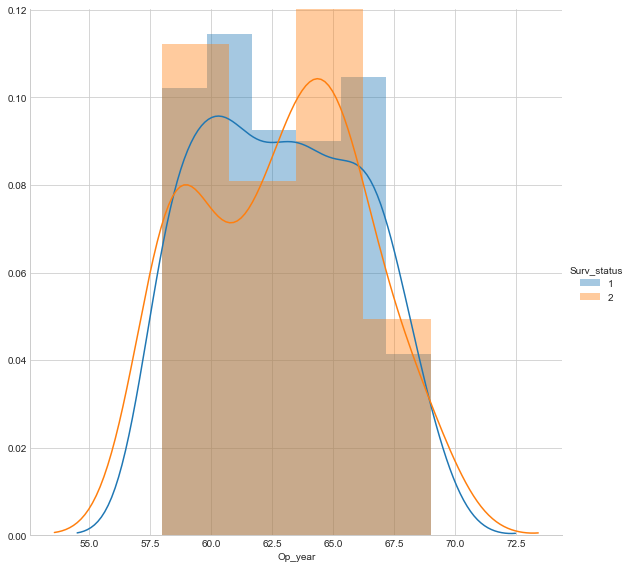

In [186]:
sns.FacetGrid(h_data, hue="Surv_status", size=8) \
   .map(sns.distplot, "Op_year") \
   .add_legend();
plt.show();

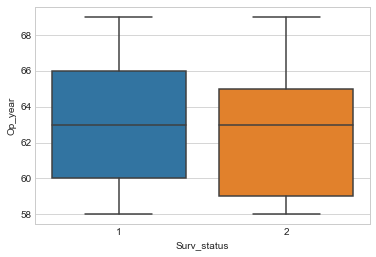

In [187]:
sns.boxplot(x='Surv_status',y='Op_year', data=h_data)
plt.show()

* Operation year also can't prerdict the survival of the patient.

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


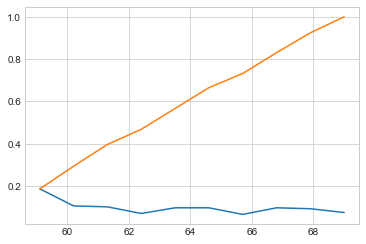

In [188]:

counts, bin_edges = np.histogram(survive['Op_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

### Observations:

* Age alone cannot depict the survival of the patient.
* Operation year also cannot depict the survival of the patient.
* Number of positive axilary nodes also cannot depict the survival of the patient.
* A simple if-else model is not possible in this case to predict the survival of the patients.
* The patients who survived have less number of positive axil nodes detected.

#### Bi-Variate Analysis :

Plotting the relation between age , operation year and survival status.

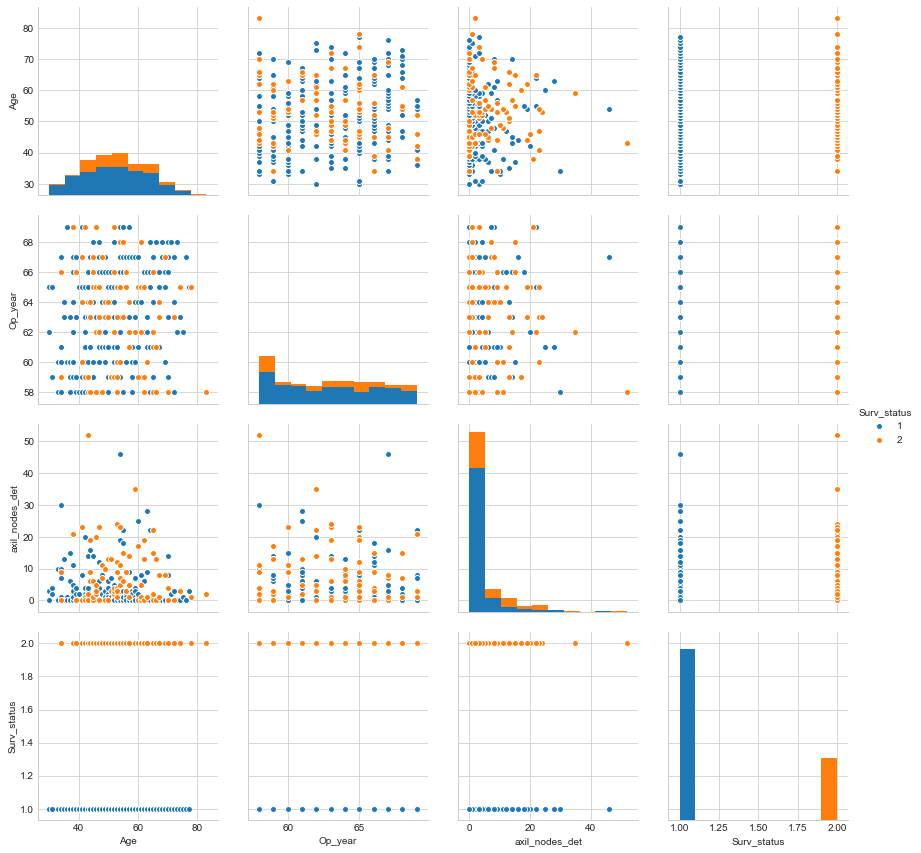

In [189]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(h_data, hue = 'Surv_status', size = 3)
plt.show()

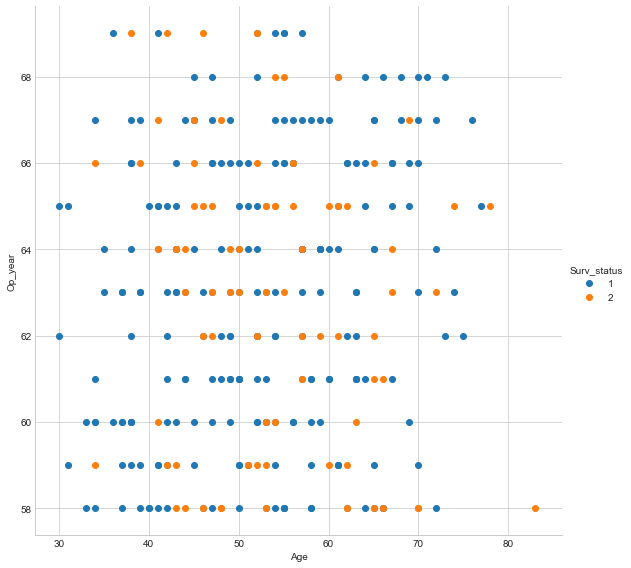

In [190]:
sns.set_style("whitegrid");
sns.FacetGrid(h_data, hue="Surv_status", size=8)\
   .map(plt.scatter, "Age", "Op_year") \
   .add_legend();
plt.show();
plt.close()

* From the above plot we can clearly say that age and operation year cannot clearly depicts whether the patient will survive or not.

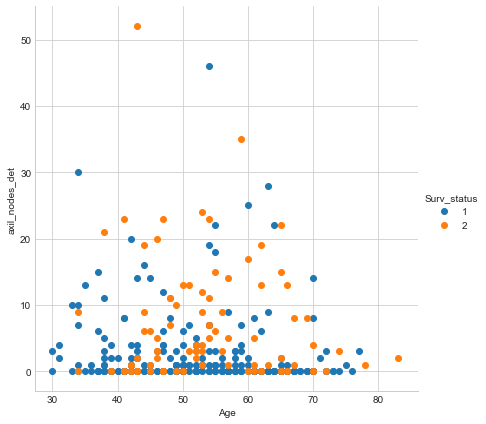

In [191]:
sns.set_style("whitegrid");
sns.FacetGrid(h_data, hue="Surv_status", size=6) .map(plt.scatter, "Age", "axil_nodes_det") .add_legend();
plt.show();
plt.close()

* This plot also can not clearly depicts whether the patient will survive or not. SO age and positive axil nodes can also not depict the survival of the patients

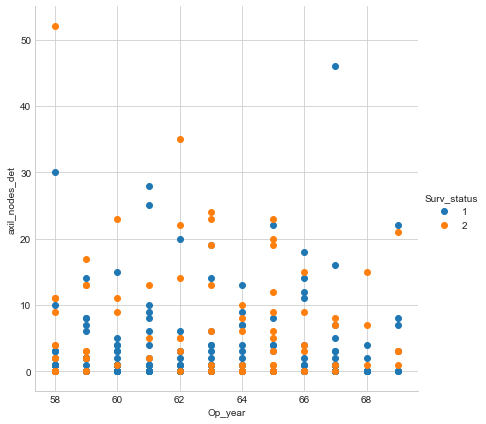

In [192]:
sns.set_style("whitegrid");
sns.FacetGrid(h_data, hue="Surv_status", size=6) .map(plt.scatter, "Op_year", "axil_nodes_det") .add_legend();
plt.show();
plt.close()

* Operation year and number of positive axil nodes can also not depict the survival of a patient.

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


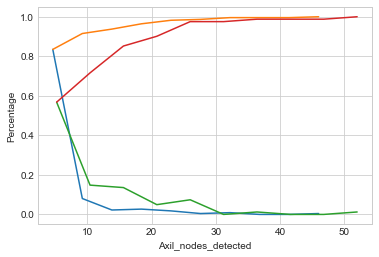

In [193]:
#survive
counts, bin_edges = np.histogram(survive['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Axil_nodes_detected")
plt.ylabel("Percentage")


# not survive
counts, bin_edges = np.histogram(notsurvive['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#### Observations:

* Age and Operation year cannot clearly predict the survival
* Age and positive axil nodes detected cannot clearly predict the survival
* Operation year and axil nodes detected cannot clearly predict the survival

#### SUMMARY:

The given attributes cannot clearly predicts the survival of the cancer patients.
The patient who survived has less number of positive axilary lymph nodes. 
The patients with 0 positive axilary lymph nodes are more likely to survive.
The patients with more that 10 positive axilary lymph nodes are more prone to not survive.